# Lista 2 - Exercício 7

**Considere o problema de otimização irrestrita unidimensional dado por**
$$\underset{x \in R}{\text{minimizar }} f(x) = 20x^2 - 10x^3+4x$$

**a) Faça o gráfico da função**

Começo definindo a função, já que utilizaremos ela várias vezes durante este exercício:

In [1]:
def f(x):
    return 20*x**2 - 10*x**3 + 4*x

Uso numpy e pyplot para fazer dois gráficos: um com range maior de $[-100,100]$ e outro com range menor de $[-2,3]$

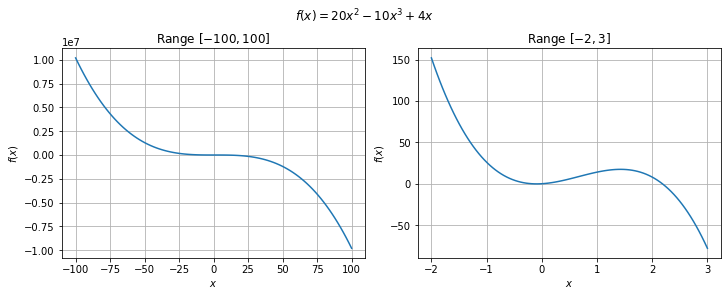

In [2]:
import numpy as np
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1,2, figsize=(10,4), constrained_layout=True)

x = np.linspace(-100, 100, 100)
y = f(x)

axs[0].plot(x, y, label='$f(x)$')
axs[0].set_xlabel('$x$')
axs[0].set_ylabel('$f(x)$')
axs[0].grid(True)
axs[0].set_title('Range $[-100, 100]$')

x = np.linspace(-2, 3, 100)
y = f(x)

axs[1].plot(x, y, label='$f(x)$')
axs[1].set_xlabel('$x$')
axs[1].set_ylabel('$f(x)$')
axs[1].grid(True)
axs[1].set_title('Range $[-2, 3]$')

fig.suptitle('$f(x) = 20x^2 - 10x^3+4x$')

plt.show()

Percebemos que a função é ilimitada inferiormente, não possuindo mínimo global. Além disso, a função possui um mínimo local próximo de $0$.

**b) Encontre minimizadores, caso existam, implementando os três os métodos estudados.
Quando for necessário, use a tolerância $\epsilon=0.00001$, o intervalo $[3,8]$ ou o ponto inicial $x^0=8$.**

In [3]:
eps = 0.00001
a = 3
b = 8
x_0 = 8

Estudamos os seguintes métodos de otimização irrestrita unidimensional: Método da bisseção, Método da secante (ou seção áurea) e Método de Newton. 

Como os métodos usam a primeira e a segunda derivada da função objetivo, defino elas:

In [4]:
def f_linha(x):
    return 40*x - 30*x**2 + 4

def f_duas_linha(x):
    return 40 - 60*x

Começo com o Método da Biseção. Como o método busca um minimizador no intervalo $[3,8]$ e vimos que a função não possui um mínimo, diminuind sem parar após o ponto $x = 2$, esperamos que o resultado deste método seja $x = 8$. Para ilustrar a razão de esperarmos que a solução do Método da Biseção seja $8$, vejamos o gráfico de $f(x)$ no intervalo em que buscaremos uma solução:

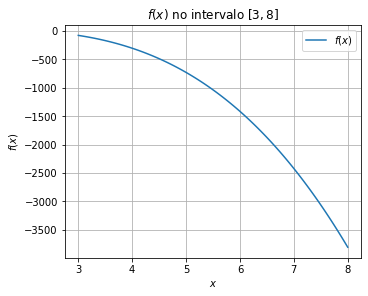

In [10]:
fig, axs = plt.subplots(1,1, figsize=(5,4), constrained_layout=True)

x = np.linspace(a, b, 100)
y = f(x)

axs.plot(x, y, label='$f(x)$')
axs.set_xlabel('$x$')
axs.set_ylabel('$f(x)$')
axs.grid(True)
axs.set_title('$f(x)$ no intervalo $[3,8]$')
axs.legend()

plt.show()

In [5]:
def metodo_bisecao(f_linha, a, b, eps, verbose=False):
    k = 0
    a_k = a
    b_k = b
    x_list = []
    while b_k-a_k > eps:
        x_k = (a_k+b_k)/2

        if verbose:
            print(f"Iteração {k}:")
            print(f"   a_{k} = {a_k}")
            print(f"   b_{k} = {b_k}")
            print(f"   x_{k} = {x_k}")

        if f_linha(x_k) < 0:
            a_k = x_k
        else:
            b_k = x_k
        k += 1

        x_list.append(x_k)

    if verbose:
        print(30*"-")
        print(f"Precisou de {k} iterações.")
        print(f"Por fim, tivemos a_k={a_k}, b_k={b_k} e b_k-a_k={b_k-a_k}")

    x_list = np.array(x_list)

    return k, a_k, b_k, x_k, x_list
    
k_bissecao, a_k, b_k, x_k_bissecao, x_list_bissecao = metodo_bisecao(f_linha, a, b, eps, verbose=False)

print('---Método da Bisseção---')
print(f'Iterações: {k_bissecao}')
print(f'a_{k_bissecao} = {a_k}, b_{k_bissecao} = {b_k}')
print(f'x_{k_bissecao} = {x_k_bissecao}')

---Método da Bisseção---
Iterações: 19
a_19 = 7.999990463256836, b_19 = 8
x_19 = 7.999990463256836


Depois, faço o Método da Secante. Assim como o método anterior, este método busca um minimizador no intervalo $[3,8]$. Portanto, espero que o resultado seja próximo de $x = 8$.

In [6]:
def metodo_secante(f, a, b, eps, verbose=False):
    k = 0
    a_k = a
    b_k = b
    while b_k-a_k > eps:
        x_k_1 = a_k + 0.38*(b_k-a_k)
        x_k_2 = a_k + 0.62*(b_k-a_k)

        if verbose:
            print(f"Iteração {k}:")
            print(f"   a_{k} = {a_k}")
            print(f"   b_{k} = {b_k}")
            print(f"   x_{k}_1 = {x_k_1}")
            print(f"   x_{k}_2 = {x_k_2}")

        if f(x_k_1) < f(x_k_2):
            b_k = x_k_2
        else:
            a_k = x_k_1
        k += 1

    if verbose:
        print(30*"-")
        print(f"Precisou de {k} iterações.")
        print(f"Por fim, tivemos a_k={a_k}, b_k={b_k} e b_k-a_k={b_k-a_k}")

    return k, a_k, b_k, x_k_1, x_k_2
    
k_secante, a_k, b_k, x_k_1, x_k_2 = metodo_secante(f, a, b, eps, verbose=False)

print('---Método da Secante---')
print(f'Iterações: {k_secante}')
print(f'a_{k_secante} = {a_k}, b_{k_secante} = {b_k}')
print(f'x_{k_secante}_1 = {x_k_1}, x_{k_secante}_2 = {x_k_2}')

---Método da Secante---
Iterações: 28
a_28 = 7.999992309805744, b_28 = 8
x_28_1 = 7.999992309805744, x_28_2 = 7.999995286655134


Por fim, faço o Método de Newton. Diferentemente dos demais métodos, este método busca por um minimizador global sem se limitar a um intervalo. Desta forma, como não existe um minimizador global para a nossa função, precisamos limitar a quantidade de iterações que o método pode exectuar, pois caso contrário o algoritmo não terminará. Defino a quantidade de iterações máximas como 100.

In [7]:
def algoritmo_newton(f, f_linha, f_duas_linha, x_0, eps, max_iter=100, verbose=False):
    k = 0
    x_k = x_0

    while abs(f(x_k)) > eps:
        if verbose:
            print(f"Iteração {k}")
            print(f"   x_{k} = {x_k}")
            print(f"   |f(x_{k})| = {abs(f(x_k))}")

        x_k = x_k-(f_linha(x_k)/f_duas_linha(x_k))
        k += 1

        if f_linha(x_k) == 0:
            print(f"f'(x_{k}) = 0.")
            print(f"Tente novamente com outro x_0.")
            break

        if f_duas_linha(x_k) == 0:
            print(f"f''(x_{k}) = 0.")
            print(f"Tente novamente com outro x_0.")
            break

        if k >= max_iter:
            if verbose:
                print('Iteração máxima atingida.')
            break # Não rodar sem esse break!

    if verbose:
        print(30*"-")
        print(f"Precisou de {k} iterações.")
        print(f"Por fim, tivemos x_{k}={x_k} e |f(x_{k})|={abs(f(x_k))}.")

    return k, x_k

k_newton, x_k_newton = algoritmo_newton(f, f_linha, f_duas_linha, x_0, eps)

print()
print('---Método de Newton---')
print(f'Iterações: {k_newton}')
print(f'x_{k_newton} = {x_k_newton}')

f'(x_9) = 0.
Tente novamente com outro x_0.

---Método de Newton---
Iterações: 9
x_9 = 1.4267836167327586


Com $x_0 = 8$, temos que o Método de Newton atinge $f'(x_k) = 0$ em $x_k \approx 1.426$. Assim, o algoritmo não pode continuar.

Podemos investigar esse ponto verificando o gráfico da função:

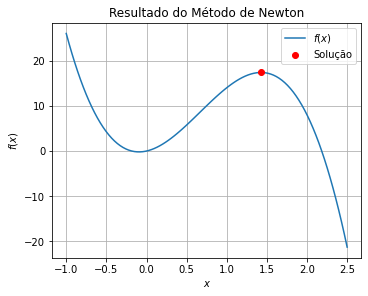

In [8]:
fig, axs = plt.subplots(1,1, figsize=(5,4), constrained_layout=True)

x = np.linspace(-1, 2.5, 100)
y = f(x)

axs.plot(x, y, label='$f(x)$')
axs.scatter(x_k_newton, f(x_k_newton), color='red', zorder=2, label='Solução')
axs.set_xlabel('$x$')
axs.set_ylabel('$f(x)$')
axs.grid(True)
axs.set_title('Resultado do Método de Newton')
axs.legend()

plt.show()

Percebemos que a solução do Método de Newton $x_k \approx 1.426$ é um ponto de máximo local de $f(x)$.